# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [2]:
# loading data
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
print(f'data size = {gold_data.shape[0]} row and {gold_data.shape[1]} columns')

data size = 2290 row and 6 columns


In [4]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


as we can see there is no missing value

In [5]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Check Correlation

<ipython-input-6-12e68be76584>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = gold_data.corr()


<Axes: >

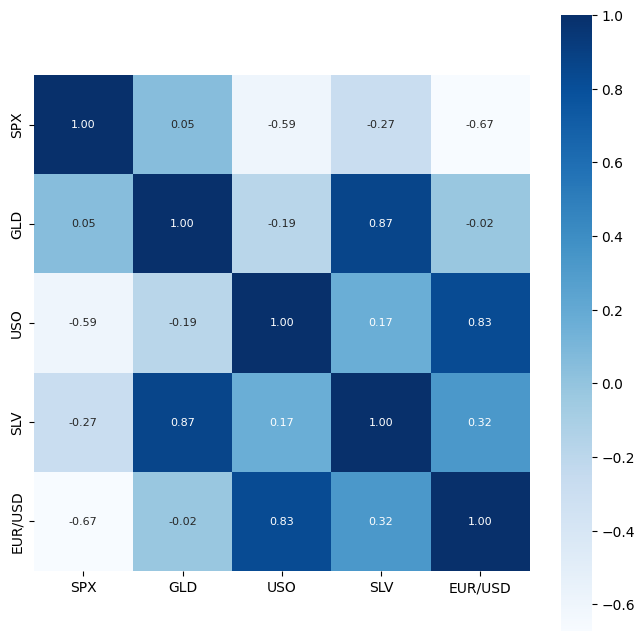

In [6]:
corr = gold_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap='Blues')

<ipython-input-7-5c1d7594d980>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

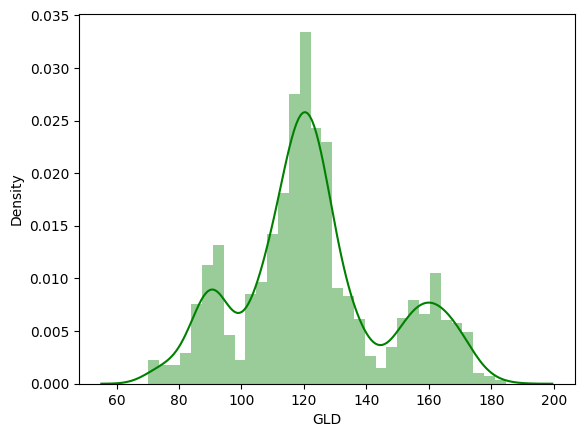

In [7]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color='green')

# Splitting the Features and Target

In [8]:
X = gold_data.drop(['Date', 'GLD'], axis=1).values
y = gold_data.GLD.values

In [9]:
X

array([[1.44716003e+03, 7.84700010e+01, 1.51800000e+01, 1.47169200e+00],
       [1.44716003e+03, 7.83700030e+01, 1.52850000e+01, 1.47449100e+00],
       [1.41163000e+03, 7.73099980e+01, 1.51670000e+01, 1.47549200e+00],
       ...,
       [2.72307007e+03, 1.44100000e+01, 1.57400000e+01, 1.19175300e+00],
       [2.73012988e+03, 1.43800000e+01, 1.55600000e+01, 1.19311800e+00],
       [2.72578003e+03, 1.44058000e+01, 1.54542000e+01, 1.18203300e+00]])

In [10]:
y

array([ 84.860001,  85.57    ,  85.129997, ..., 125.18    , 124.489998,
       122.5438  ])

Splitting into Training data and Testing data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Model Training

We will use:


1.   Multiple Linear Regression
2.   Random Forest Regression



# MLR Model:

In [12]:
regressor = LinearRegression()

Training The Model

In [13]:
regressor.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
# R squared error
r2 = metrics.r2_score(y_test, y_pred)
print('R2 Error :', r2)

R2 Error : 0.8657886565869238


Visualize the MLR result

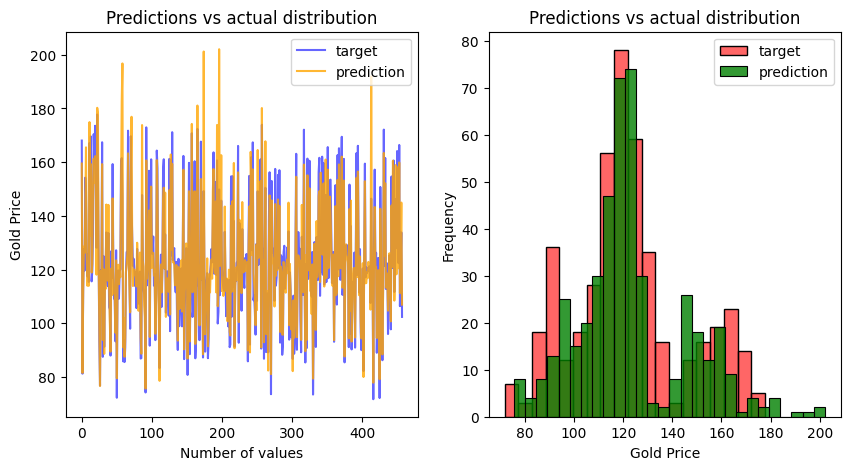

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].plot(y_test, label='target', color='blue', alpha=0.6)
axes[0].plot(y_pred, label='prediction', color='orange', alpha=0.8)
axes[0].set_ylabel('Gold Price')
axes[0].set_xlabel('Number of values')
axes[0].set_title('Predictions vs actual distribution')
axes[0].legend()

axes[1] = sns.histplot(y_test, label='target', color='red', alpha=0.6)
axes[1] = sns.histplot(y_pred, label='prediction', color='green', alpha=0.8)
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Gold Price')
axes[1].set_title('Predictions vs actual distribution')
axes[1].legend()

plt.tight_layout
plt.show()

# Random Forest Regression Model:

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

Training The Model

In [18]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
# R squared error
r2 = metrics.r2_score(y_test, y_pred)
print('R2 Error :', r2)

R2 Error : 0.9893259990259129


Visualize the Random Forest Regression result

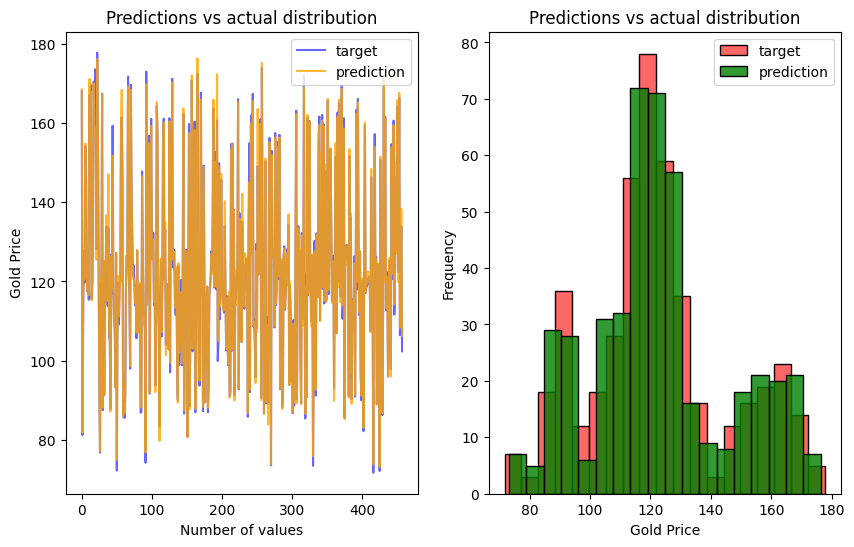

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axes[0].plot(y_test, label='target', color='blue', alpha=0.6)
axes[0].plot(y_pred, label='prediction', color='orange', alpha=0.8)
axes[0].set_ylabel('Gold Price')
axes[0].set_xlabel('Number of values')
axes[0].set_title('Predictions vs actual distribution')
axes[0].legend(loc='upper right')

axes[1] = sns.histplot(y_test, label='target', color='red', alpha=0.6)
axes[1] = sns.histplot(y_pred, label='prediction', color='green', alpha=0.8)
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Gold Price')
axes[1].set_title('Predictions vs actual distribution')
axes[1].legend()

plt.tight_layout
plt.show()